# Week 6 handin - by Sebastian Bentley (cph-sb287)

Create a module containing a class with the following methods:
1. init(self, url_list)
2. download(url,filename) raises NotFoundException when url returns 404
3. multi_download() uses threads to download multiple urls as text and stores filenames as a property
4. iter() returns an iterator
5. next() returns the next filename (and stops when there are no more)
6. urllist_generator() returns a generator to loop through the urls
7. avg_vowels(text) - a rough estimate on readability returns average number of vowels in the words of the text
8. hardest_read() returns the filename of the text with the highest vowel score (use all the cpu cores on the computer for this work.

### Ex 2
Create a notebook and import your module from above
1. Find 10 books on https://www.gutenberg.org/browse/scores/top and download them using an object of the class you just created before
2. Test the different methods of your class
3. Make a bar plot with a sorted list of books on x-axis and avg vowels on y-axis

## 02 Status

## 03 Solution part 1

In [1]:
# Code for solution can be found at python_handin_template/modules/week6/text_comparer.py

## 04 Solution part 2

In [2]:
#Create a notebook and import your module from above
from modules.week6 import text_comparer as tc

#Find 10 books on https://www.gutenberg.org/browse/scores/top
#and download them using an object of the class you just created before
books = ['https://www.gutenberg.org/files/84/84-0.txt','https://www.gutenberg.org/files/1342/1342-0.txt','https://www.gutenberg.org/files/64317/64317-0.txt', 'https://www.gutenberg.org/files/1080/1080-0.txt','https://www.gutenberg.org/files/2542/2542-0.txt', 'https://www.gutenberg.org/files/98/98-0.txt', 'https://www.gutenberg.org/files/98/98-0.txt','https://www.gutenberg.org/files/844/844-0.txt','https://www.gutenberg.org/files/25344/25344-0.txt','https://www.gutenberg.org/cache/epub/5200/pg5200.txt']

comparer = tc.TextComparer(books)
comparer.multi_download()


### Test the different methods of your class:

In [3]:
#Test download (multi_download is tested above)
try:
    #This one is fine
    comparer.download("https://api.chucknorris.io/jokes/random", 'modules/week6/textfiles/test.txt')
    #This one fails (on purpose to show exception)
    comparer.download("https://www.gutenberg.org/files/84/84-0.txt/hej", 'modules/week6/textfiles/test.txt')
except tc.NotFoundException:
    print("URL was not OK")


URL was not OK


In [4]:
#Test __iter__, __next__ and and urllist_generator

#iter
print(iter(comparer))

#next
print(next(comparer))

    
#urllist_generator
[x for x in comparer.urllist_generator()]

modules/week6/textfiles/file0.txt


['https://www.gutenberg.org/files/84/84-0.txt',
 'https://www.gutenberg.org/files/1342/1342-0.txt',
 'https://www.gutenberg.org/files/64317/64317-0.txt',
 'https://www.gutenberg.org/files/1080/1080-0.txt',
 'https://www.gutenberg.org/files/2542/2542-0.txt',
 'https://www.gutenberg.org/files/98/98-0.txt',
 'https://www.gutenberg.org/files/98/98-0.txt',
 'https://www.gutenberg.org/files/844/844-0.txt',
 'https://www.gutenberg.org/files/25344/25344-0.txt',
 'https://www.gutenberg.org/cache/epub/5200/pg5200.txt']

In [5]:
#Test avg_vowels and hardest_read

print('Average in file0.txt: ' + str(comparer.avg_vowels('modules/week6/textfiles/file0.txt')))

print('Hardest read: ' + comparer.hardest_read())

Average in file0.txt: 1.86
Hardest read: modules/week6/textfiles/file3.txt


<BarContainer object of 10 artists>

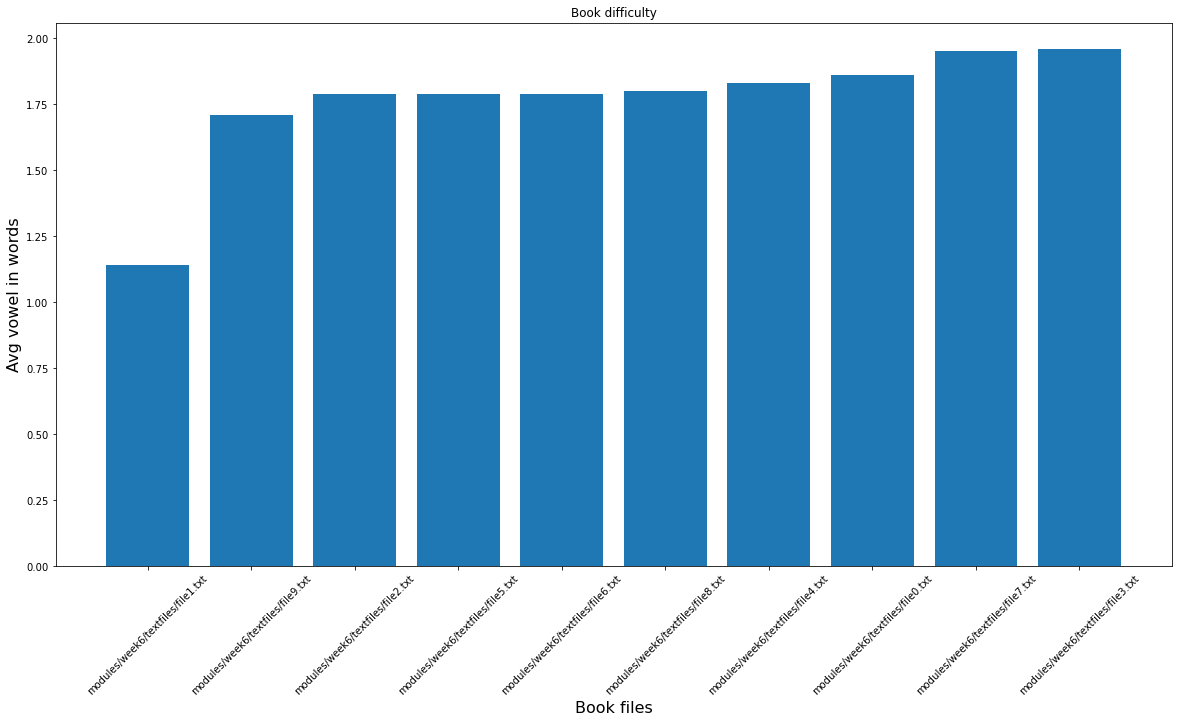

In [13]:
#Make a bar plot with a sorted list of books on x-axis and avg vowels on y-axis
import matplotlib.pyplot as plt
%matplotlib inline

bar_dict = comparer.bar_data()

x = list(bar_dict.keys())
y = list(bar_dict.values())
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.title("Book difficulty", fontsize=12)
plt.xlabel("Book files", fontsize=16)
plt.ylabel("Avg vowel in words", fontsize=16)

plt.bar(x,y)

